# ANÁLISIS DE VENTAS

- Darle una última revisión
- Mandar al cuaderno 2
- Adecuar lo hecho aquó al cuaderno 2, si es posible, dividir los resultados por año

# PROBLEMAS DE REGRESIÓN

#### IMPORTACIONES

In [39]:
# LIBRERÍAS GENERALES
import pandas as pd                                     # Importaciín y manipulación de dataframes
import numpy as np                                      # Trabajar con dataframe
import matplotlib.pyplot as plt                         # Trabajar con gráficas

# LIBRERÍAS DE MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression       # Para Regresión Lineal
from sklearn.metrics import mean_squared_error          # Para medir el Error
from sklearn.preprocessing import PolynomialFeatures    # Para Regresión Polinomial

# OTRAS LIBRERÍAS
import seaborn as sns                                   # Pala hacer los mapas de calor




In [7]:
# IMPORTACIÓN DEL DATASET ORIGINAL
df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset
df_online_sales['item_id'] = df_online_sales['item_id'].astype('int')          # Cambiamos el tipo de datos de date_OK
df_online_sales.head()                                                  # Revisamos el dataframe

C:\Users\aizam\AppData\Local\Temp\ipykernel_6028\4037807346.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,PhoneNo,PlaceName,County,City,State,Zip,Region,UserName,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [12]:
# DATASET ANALIZABLE

df_online_sales_num = pd.read_csv('dataset/online_sales_analize_rec01.csv', index_col=0)
df_online_sales_num.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,...,year,month,Gender,age,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,0.0,1798.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,0.0,190.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,0.0,1199.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,0.0,639.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,0.0,99.9,9,...,2020,11,1,43,37,73571,3,0.0,34.9325,-99.92476


In [20]:

# df_online_sales_num.dtypes
df_online_sales_num['order_date'] = df_online_sales_num['order_date'].astype('datetime64[us]')
df_online_sales_num.dtypes

order_id                     int64
order_date          datetime64[us]
status                       int64
item_id                      int64
sku                          int64
qty_ordered                  int64
price                      float64
discount_amount            float64
total                      float64
category                     int64
payment_method               int64
cust_id                      int64
year                         int64
month                        int64
Gender                       int64
age                          int64
State                        int64
zip                          int64
Region                       int64
Discount_Percent           float64
lat                        float64
lng                        float64
CustomerSince       datetime64[us]
dtype: object

## REGRESIÓN LINEAL

Se utilizará para hacer una predicción del total de ventas, por lo tanto, vamos a predecir 'total', que es el total de la venta.

<Axes: >

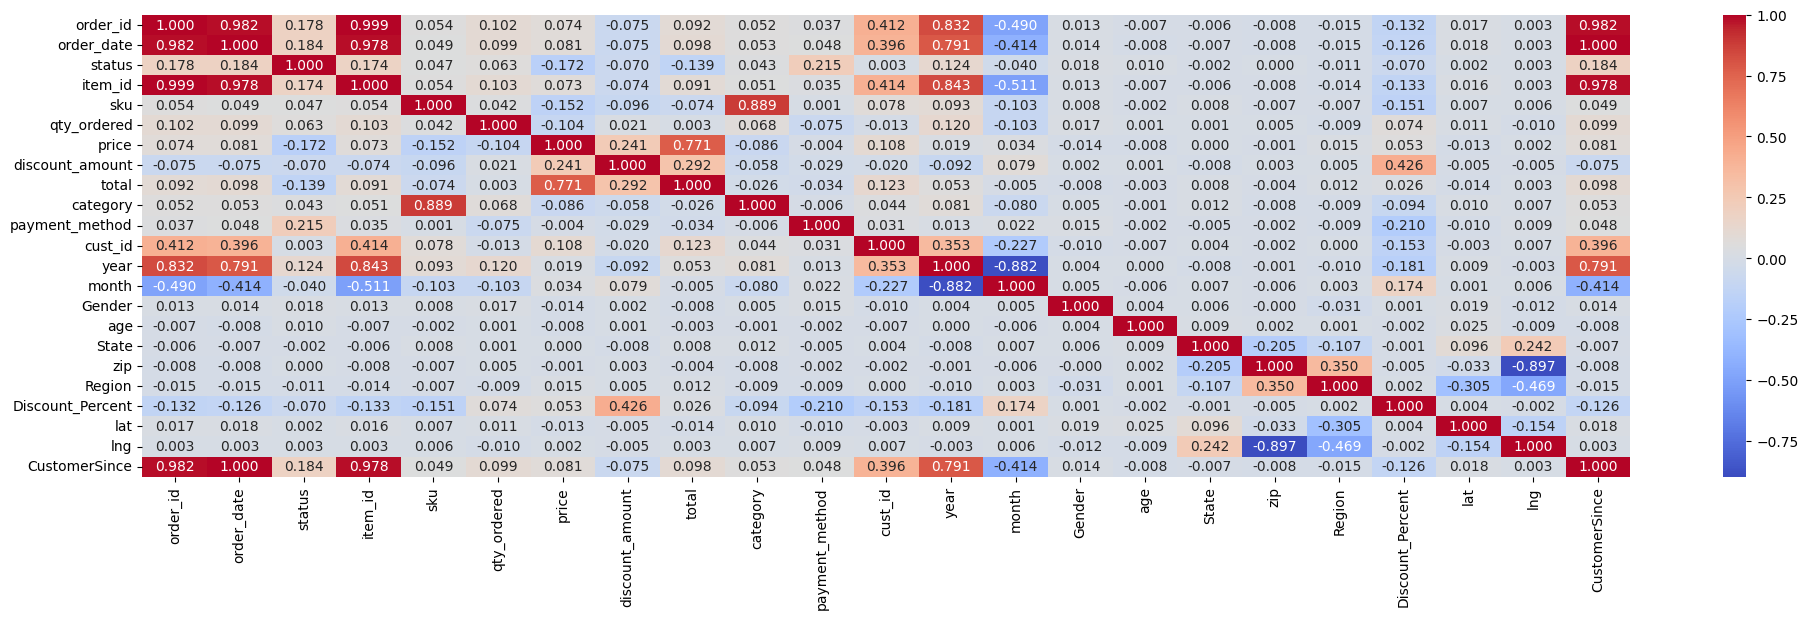

In [22]:
# Determinamos las correlacioens con el dataset analizable

# Graficamos un heatmap de correlación de columnas
plt.figure(figsize=(24, 6))
sns.heatmap(df_online_sales_num.corr(), annot= True, cmap= 'coolwarm', fmt= '.3f')

In [23]:
# Dada la correlación, elegiremos dos campos para X: 'price' y 'discount_amount'
X = df_online_sales_num[['price', 'discount_amount']]
Y = df_online_sales_num['total']

In [24]:
# Dividiremos los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el total
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(171835, 2)
(114557, 2)
(171835,)
(114557,)


#### Entrenamiento y predicciones

In [25]:
# Entrenamos el modelo
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
# Con el modelo entrenado vamos a hacer predicciones usando los datos de entrenamiento y los datos de prueba que son desconocidos para el modelo
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =1625054.1434727942
Pruebas: MSE =1441880.7802124885


Dado los MSE tan altos, se filtrará el dataframe a un estado, California (CA, número 5)

In [28]:
# Definimos variables
df_online_sales_california = df_online_sales_num
target_state = 5

# Filtramos el dataframe
df_online_sales_california = df_online_sales_california[df_online_sales_california['State'] == target_state]

# Visualizamos el dataframe filtrado
df_online_sales_california.head()


,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,...,month,Gender,age,State,zip,Region,Discount_Percent,lat,lng,CustomerSince
210,30,2020-10-01,1,574823,3944,2,445.0,0.0,445.0,1,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
211,30,2020-10-01,1,574824,47376,3,1279.9,0.0,2559.8,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
212,30,2020-10-01,1,574825,20653,2,1690.0,0.0,1690.0,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
213,31,2020-10-01,1,574826,3944,2,445.0,0.0,445.0,1,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
214,31,2020-10-01,1,574827,47376,3,1279.9,0.0,2559.8,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01


<Axes: >

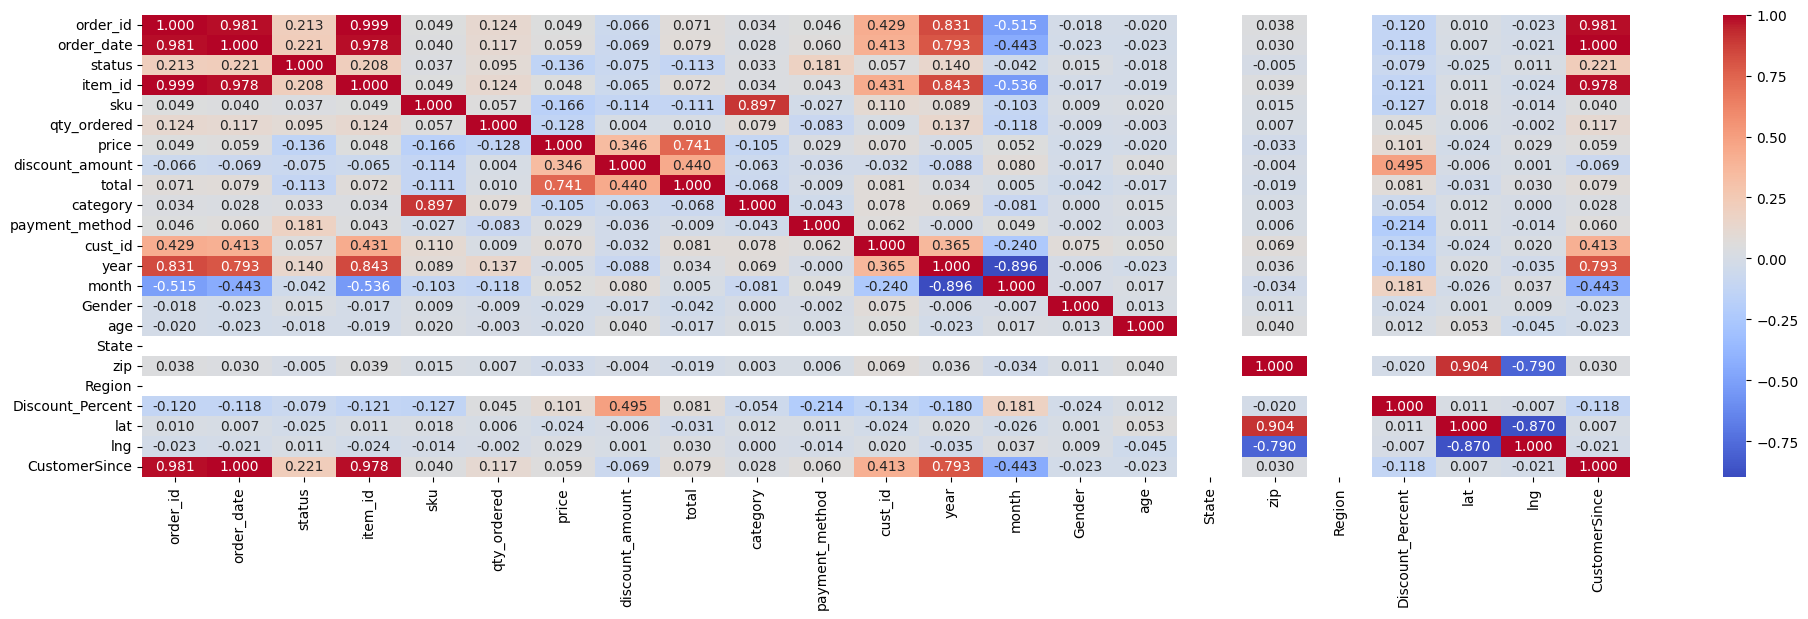

In [29]:
# Determinamos las correlacioens con el dataset analizable

# Graficamos un heatmap de correlación de columnas
plt.figure(figsize=(24, 6))
sns.heatmap(df_online_sales_california.corr(), annot= True, cmap= 'coolwarm', fmt= '.3f')

In [30]:
# Dada la correlación, elegiremos de nuevo dos campos para X: 'price' y 'discount_amount'
X = df_online_sales_california[['price', 'discount_amount']]
Y = df_online_sales_california['total']

In [31]:
# Dividiremos los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el total
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10278, 2)
(6852, 2)
(10278,)
(6852,)


In [32]:
# Entrenamos el modelo
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Con el modelo entrenado vamos a hacer predicciones usando los datos de entrenamiento y los datos de prueba que son desconocidos para el modelo
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =1209282.470056414
Pruebas: MSE =1070227.1798666287


Agregaremos mas variable para ver si se puede reducir el MSE

In [34]:
# Dada la correlación, elegiremos de nuevo dos campos para X: 'price' y 'discount_amount'
X = df_online_sales_california[['price', 'discount_amount', 'qty_ordered', 'cust_id']]
Y = df_online_sales_california['total']

In [35]:
# Dividiremos los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el total
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10278, 4)
(6852, 4)
(10278,)
(6852,)


In [36]:
# Entrenamos el modelo
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Con el modelo entrenado vamos a hacer predicciones usando los datos de entrenamiento y los datos de prueba que son desconocidos para el modelo
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =1182346.8266655137
Pruebas: MSE =1038732.579781447


In [38]:
# Comparamos las prediciciones y lso valires reales
df_predicciones = pd.DataFrame({'valor_real':Y_test,
                                'prediccion':y_test_predict,
                                'diferencia': Y_test - y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(20)

,valor_real,prediccion,diferencia
0,2000.00,542.785730,1457.214270
1,842.60,643.936411,198.663589
2,135.00,192.926427,-57.926427
3,78.00,237.136910,-159.136910
4,445.00,335.240052,109.759948
5,0.00,118.260163,-118.260163
6,834.00,467.965260,366.034740
7,2375.00,1610.869335,764.130665
8,1839.60,1901.143378,-61.543378
9,4442.40,2960.731515,1481.668485


## REGRESIÓN POLINOMIAL

In [40]:
# Visualizamos el dataframe filtrado con el que seguiremos trabajando
df_online_sales_california.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,...,month,Gender,age,State,zip,Region,Discount_Percent,lat,lng,CustomerSince
210,30,2020-10-01,1,574823,3944,2,445.0,0.0,445.0,1,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
211,30,2020-10-01,1,574824,47376,3,1279.9,0.0,2559.8,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
212,30,2020-10-01,1,574825,20653,2,1690.0,0.0,1690.0,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
213,31,2020-10-01,1,574826,3944,2,445.0,0.0,445.0,1,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01
214,31,2020-10-01,1,574827,47376,3,1279.9,0.0,2559.8,10,...,10,2,46,5,91734,4,0.0,NaN,NaN,2020-10-01


In [41]:
# Volvemos a preparar al modelo, pero ahora para aplicar regresión polinomial

# Dada la correlación, elegiremos de nuevo dos campos para X: 'price' y 'discount_amount'
# X = df_online_sales_california[['price', 'discount_amount', 'qty_ordered', 'cust_id']]        # Por si se llega a necesitar mas adelante
X = df_online_sales_california[['price', 'discount_amount']]
Y = df_online_sales_california['total']

# Separamos los datos de prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

#### Ejemplo de Regresión Lineal

In [42]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =1209282.470056414
Pruebas: MSE =1070227.1798666287


,valor_real,prediccion,diferencia
0,2000.0,367.458978,1632.541022
1,842.6,642.900737,199.699263
2,135.0,202.542425,-67.542425
3,78.0,167.069807,-89.069807
4,445.0,395.463675,49.536325
5,0.0,118.528331,-118.528331
6,834.0,378.038530,455.961470
7,2375.0,1596.554043,778.445957
8,1839.6,1867.335323,-27.735323
9,4442.4,2883.152087,1559.247913


#### Aplicando Regresión Polinomial de segundo grado

In [43]:
# Instanciamos un modelo para hacerlo polinómico
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)     # Definimos el grado del polinomio

# Transformamos los datos para poder entrenar el modelo
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

# Entrenamos el modelo lineal con los datos transformados para que sea polinómico
poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

# Calculo de errores
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

# Comparacion de valores
df_predicciones = pd.DataFrame({'valor_real':Y_test,
                                'prediccion':y_test_predict,
                                'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =1122395.289265803
Pruebas: MSE =1115969.9442837369


,valor_real,prediccion,diferencia
0,2000.0,364.534840,1635.465160
1,842.6,690.336797,152.263203
2,135.0,167.161071,-32.161071
3,78.0,124.481494,-46.481494
4,445.0,397.879675,47.120325
5,0.0,65.948433,-65.948433
6,834.0,377.137629,456.862371
7,2375.0,1781.150725,593.849275
8,1839.6,1977.276780,-137.676780
9,4442.4,3161.320043,1281.079957


## Predicción de series de tiempo

In [44]:
# Convertir serie de tiempo a dataset                                       # PASAR AL ARCHIVO DE UTILERIAS

def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [45]:
# Determinamos el total de ventas diarias para tener un dataframe con series de tiempo

# Definimos las columnas utilizadas
fecha_col = 'order_date'
total_col = 'total'

# Realizamos los cálculos y los desplegamos
fecha_totals = df_online_sales_num.groupby(fecha_col)[total_col].sum().reset_index()    # Calculamos el total de ventas por día
fecha_totals = fecha_totals.sort_values(by=fecha_col, ascending=True)                   # Ordemanos los resultados en orden descendente
fecha_totals.head(10)                                                                   # Desplegamos los primeros 10 días

,order_date,total
0,2020-10-01,219672.11100
1,2020-10-02,78931.49000
2,2020-10-03,254652.23035
3,2020-10-04,105074.33500
4,2020-10-05,124694.49800
5,2020-10-06,67020.26400
6,2020-10-07,80294.24700
7,2020-10-08,185336.86600
8,2020-10-09,197760.05500
9,2020-10-10,89349.27100


In [46]:
# Confirmamos los tipos de datos del dataframe
fecha_totals.dtypes

order_date    datetime64[us]
total                float64
dtype: object

In [47]:
fecha_totals['total']
serie = fecha_totals['total'].to_numpy()

X, Y = transformarSerieADataset(serie, elementosPorMuestra = 10)

In [48]:
# Dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre las ventas
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(212, 10)
(142, 10)
(212,)
(142,)


In [49]:
# Trataremos de predecir que tal funcionará el Regresor Lineal
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [50]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =1139131639328.8933
Pruebas: MSE =1003261944498.2938


#### Probaremos con el dataframe completo

In [51]:
# Creamos un nuevo dataframe 

# Definimos las columnas
selected_columns = ['order_date', 'total']

# Creamos el nuevo dataframe
df_date_total = df_online_sales_num
df_date_total = df_date_total[selected_columns]
df_date_total.head(10)

,order_date,total
0,2020-10-01,1798.0
1,2020-10-01,190.0
2,2020-10-01,1199.2
3,2020-10-01,639.2
4,2020-11-13,99.9
5,2020-11-13,39.9
6,2020-11-13,47.6
7,2020-10-01,49.0
8,2020-10-01,135.0
9,2020-10-01,549.9


In [54]:
df_date_total['total']
serie = df_date_total['total'].to_numpy()

X, Y = transformarSerieADataset(serie, elementosPorMuestra = 10)

In [55]:
# Dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre las ventas
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(171828, 10)
(114553, 10)
(171828,)
(114553,)


In [56]:
# Trataremos de predecir que tal funcionará el Regresor Lineal
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [57]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =2286298.406018291
Pruebas: MSE =2351904.013744577


Intentaremos con un Regresor Polinomial

In [58]:
# Reutilizaremos las particiones de entrenamiento y prueba para el entrenamiento y las predicciones
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [59]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =2286298.406018291
Pruebas: MSE =2351904.013744577


,valor real,prediccion,diferencia
0,17.55,184.691809,-167.141809
1,195.00,308.282121,-113.282121
2,29.90,170.427294,-140.527294
3,104.00,230.192625,-126.192625
4,40.00,191.499811,-151.499811
5,1559.75,320.930554,1238.819446
6,670.00,805.419730,-135.419730
7,113.80,489.826875,-376.026875
8,49.80,206.472166,-156.672166
9,5999.80,4709.309196,1290.490804
